In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Import models from scikit learn module:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, RandomForestRegressor
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [3]:
col_names = ['age', 'workclass', 'fnlwgt','education', 'education-num', 
'marital-status', 'occupation', 'relationship', 'race', 'sex',
'capital-gain','capital-loss', 'hours-per-week','native-country', 'income']
df = pd.read_csv('adult.csv', header=None, names = col_names)

In [3]:
#Distribution of income
print(df['income'].value_counts(normalize=True))

In [3]:
print(df.dtypes)

In [3]:
#Clean columns by stripping extra whitespace for columns of object type
df['workclass']=df['workclass'].str.strip()
df['education']=df['education'].str.strip()
df['marital-status']=df['marital-status'].str.strip()
df['occupation']=df['occupation'].str.strip()
df['relationship']=df['relationship'].str.strip()
df['race']=df['race'].str.strip()
df['sex']=df['sex'].str.strip()
df['native-country']=df['native-country'].str.strip()
df['income']=df['income'].str.strip()

In [3]:
feature_cols = ['age',
       'capital-gain', 'capital-loss', 'hours-per-week', 'sex','race']
#Create feature dataframe X with feature columns and dummy variables for categorical features
X = pd.get_dummies(df[feature_cols], drop_first=True)

#Create output variable y which is binary, 0 when income is less than 50k, 1 when it is greather than 50k
df['income'] = ~(df['income'] =='>50K')
y = df['income']
print(y)

In [3]:
#Split data into a train and test set
x_train, x_test, y_train, y_test= train_test_split(X,y, test_size=.2, random_state=1)

In [3]:
accuracy_train=[]
accuracy_test = []
for i in range(1,25):
    rf_2 = RandomForestClassifier(max_depth=i)
    rf_2.fit(x_train, y_train)
    y_pred = rf_2.predict(x_test)
    accuracy_train.append(accuracy_score(y_train, rf_2.predict(x_train)))
    accuracy_test.append(accuracy_score(y_test,rf_2.predict(x_test)))

In [3]:
#Find the best accuracy and at what depth that occurs
best_accuracy_train = np.max(accuracy_train)
best_accuracy_test = np.max(accuracy_test)
best_depth = range(1,25)[np.argmax(accuracy_test)]
print(best_accuracy_train)
print(best_accuracy_test)
print(best_depth)

In [3]:
#Plot the accuracy scores for the test and train set over the range of depth values  
plt.plot(range(1,25), accuracy_test,'bo--',range(1,25), accuracy_train,'r*:')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend(['test accuracy', 'train accuracy'])
plt.show()

In [3]:
#Create two new features, based on education and native country
bins = [0, 9, 13, 16]
bin_labels = ['High school and less', 'College to Bachelors', 'masters and more']
df['education_bin'] = pd.cut(df['education-num'], bins=bins, labels=bin_labels, right=False)
feature_cols = ['age',
       'capital-gain', 'capital-loss', 'hours-per-week', 'sex', 'race','education_bin']
#Use these two new additional features and recreate X and test/train split
X = pd.get_dummies(df[feature_cols], drop_first=True)

In [3]:
x_train, x_test, y_train, y_test= train_test_split(X,y, test_size=.2, random_state=1)

In [3]:
#Find the best max depth now with the additional two features
accuracy_test_2 = []
accuracy_train_2 = []
max_depth = range(1,10)

for i in max_depth:
    df_3 = RandomForestClassifier(max_depth=i)
    df_3.fit(x_train, y_train)
    y_pred = df_3.predict(x_test)
    accuracy_train_2.append(accuracy_score(y_train, df_3.predict(x_train)))
    accuracy_test_2.append(accuracy_score(y_test, df_3.predict(x_test)))

In [3]:
best_test = np.max(accuracy_test_2)
best_train = np.max(accuracy_train_2)
best_depth = max_depth[np.argmax(accuracy_test_2)]

In [3]:
#Save the best model and print the two features with the new feature set
print(f'The best test accuracy score is {best_test}')
print(f'The best depth for the updated accuracy test is {best_depth}')

In [3]:
plt.plot(max_depth, accuracy_test_2,'bo--', max_depth, accuracy_train_2,'r*:')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend(['test accuracy', 'train accuracy'])
plt.show()

income
 <=50K    0.75919
 >50K     0.24081
Name: proportion, dtype: float64
age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object
0         True
1         True
2         True
3         True
4         True
         ...  
32556     True
32557    False
32558     True
32559     True
32560    False
Name: income, Length: 32561, dtype: bool
0.8601044226044227
0.8340242591739597
12


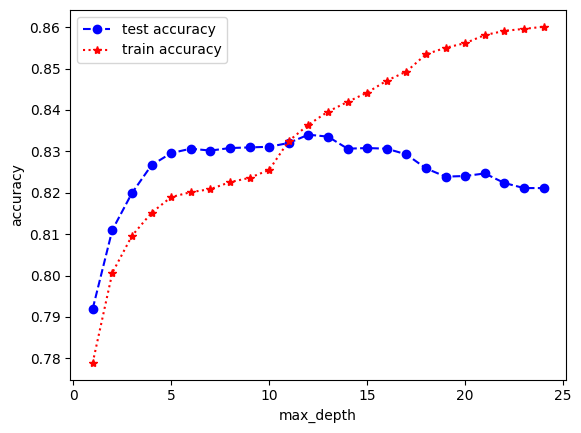

The best test accuracy score is 0.8460003070781514
The best depth for the updated accuracy test is 9


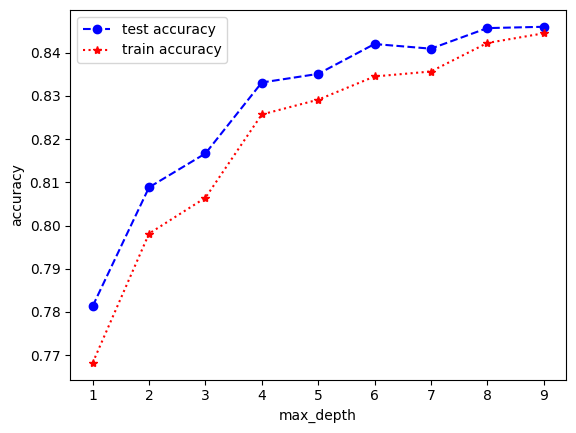

0.844925533548288


In [3]:
df_3 = RandomForestClassifier(max_depth=8)
df_3.fit(x_train, y_train)
y_pred = df_3.predict(x_test)
print(accuracy_score(y_test, y_pred))